# Learning scikit-learn 

## An Introduction to Machine Learning in Python

### at PyData Chicago 2016 

"Sebastian Raschka"

# Table of Contents

* [1 Introduction to Machine Learning](#1-Introduction-to-Machine-Learning)
* [2 Linear Regression](#2-Linear-Regression)
    * [Loading the dataset](#Loading-the-dataset)
    * [Preparing the dataset](#Preparing-the-dataset)
    * [Fitting the model](#Fitting-the-model)
    * [Evaluating the model](#Evaluating-the-model)
* [3 Introduction to Classification](#3-Introduction-to-Classification)
    * [The Iris dataset](#The-Iris-dataset)
    * [Class label encoding](#Class-label-encoding)
    * [Scikit-learn's in-build datasets](#Scikit-learn's-in-build-datasets)
    * [Test/train splits](#Test/train-splits)
    * [Logistic Regression](#Logistic-Regression)
    * [K-Nearest Neighbors](#K-Nearest-Neighbors)
    * [3 - Exercises](#3---Exercises)
* [4 - Feature Preprocessing & scikit-learn Pipelines](#4---Feature-Preprocessing-&-scikit-learn-Pipelines)
    * [Categorical features: nominal vs ordinal](#Categorical-features:-nominal-vs-ordinal)
    * [Normalization](#Normalization)
    * [Pipelines](#Pipelines)
    * [4 - Exercises](#4---Exercises)
* [5 - Dimensionality Reduction: Feature Selection & Extraction](#5---Dimensionality-Reduction:-Feature-Selection-&-Extraction)
    * [Recursive Feature Elimination](#Recursive-Feature-Elimination)
    * [Sequential Feature Selection](#Sequential-Feature-Selection)
    * [Principal Component Analysis](#Principal-Component-Analysis)
* [6 - Model Evaluation & Hyperparameter Tuning](#6---Model-Evaluation-&-Hyperparameter-Tuning)
    * [Wine Dataset](#Wine-Dataset)
    * [Stratified K-Fold](#Stratified-K-Fold)
    * [Grid Search](#Grid-Search)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1 Introduction to Machine Learning

# 2 Linear Regression

### Loading the dataset

Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to 
to the Size of the Head", Biometrika, Vol. 4, pp105-123


Description: Brain weight (grams) and head size (cubic cm) for 237
adults classified by gender and age group.


Variables/Columns
- Gender (1=Male, 2=Female)
- Age Range (1=20-46, 2=46+)
- Head size (cm^3)
- Brain weight (grams)


In [127]:
df = pd.read_csv('dataset_brain.txt', 
                 dtype={'gender': int, 'age-group': int},
                 encoding='utf-8', 
                 comment='#',
                 sep='\s+')
df.tail()

,gender,age-group,head-size,brain-weight
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170
236,2,2,3391,1120


In [128]:
df.dtypes

gender          int64
age-group       int64
head-size       int64
brain-weight    int64
dtype: object

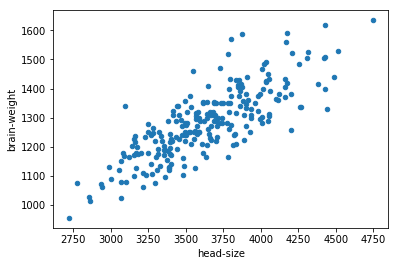

In [129]:
df.plot(x='head-size', y='brain-weight', kind='scatter')

#seems some outliers or a transformation need

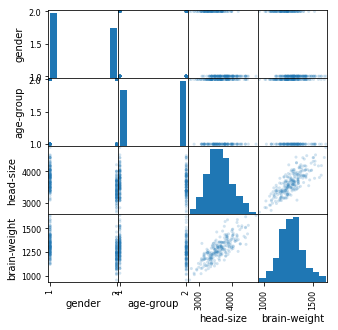

In [130]:
z = pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(5, 5))

In [131]:
df.groupby(['age-group']).mean()

,gender,head-size,brain-weight
age-group,,,
1,1.481818,3675.281818,1304.736364
2,1.393701,3598.228346,1263.937008


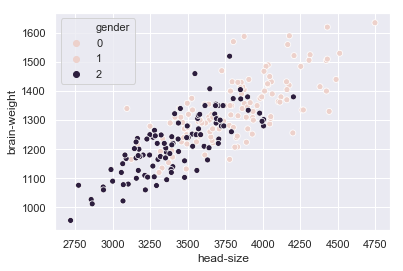

In [157]:
import seaborn as sns

sns.set_color_codes(palette='dark')
sns.scatterplot(x='head-size', y='brain-weight', hue='gender', color='g', data=df)

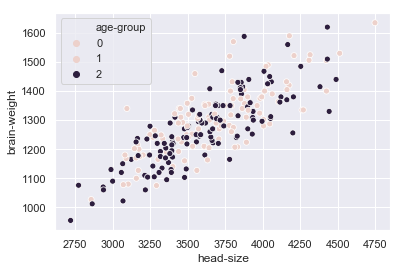

In [158]:
sns.scatterplot(x='head-size', y='brain-weight', hue='age-group', color='m', data=df)

### Preparing the dataset

In [17]:
y = df['brain-weight'].values
y.shape

(237,)

In [29]:
X = df['head-size'].values
X = X[:, np.newaxis]
X.shape

(237, 1)

In [30]:
X[0:3]

array([[4512],
       [3738],
       [4261]])

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=125)

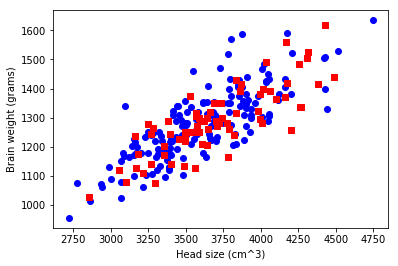

In [64]:

plt.scatter(X_train, y_train, c='blue', marker='o')
plt.scatter(X_test, y_test, c='red', marker='s')
plt.xlabel('Head size (cm^3)')
plt.ylabel('Brain weight (grams)');

### Fitting the model

In [65]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [66]:
print('r-squared:', lr.score(X_train, y_train),
      '\nadjusted r-squared:', 1- (1-lr.score(X_train, y_train)) * (X_train.shape[0]-1) / (X_train.shape[0]-X_train.shape[1]-1))


r-squared: 0.6354950230876757 
adjusted r-squared: 0.6332587962354528


In [73]:
y_pred = lr.predict(X_test)

y_hat_train = lr.predict(X_train)

### Evaluating the model

- r-squared of X_train vs r-squared of X_test
- prediction of X_train (y_hat_train) vs y_train 


In [74]:
print(f'R2 score: {lr.score(X_test, y_test)}' )

R2 score: 0.6404876746354844


In [75]:
lr.coef_[0], lr.intercept_

# y(weight) = 302 + 0.27 * x(size)

(0.26944099519766185, 308.53548372134196)

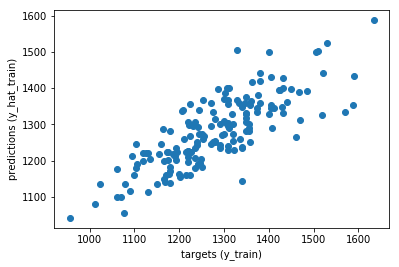

In [76]:
plt.scatter(y_train, y_hat_train)
plt.xlabel('targets (y_train)')
plt.ylabel('predictions (y_hat_train)')


plt.show()

# 45 degrees means it is ok. below is not bad.

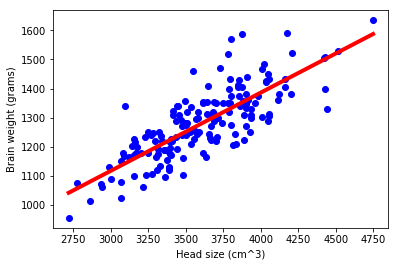

In [77]:
min_pred = X_train.min() * lr.coef_ + lr.intercept_
max_pred = X_train.max() * lr.coef_ + lr.intercept_

plt.scatter(X_train, y_train, c='blue', marker='o')
plt.plot([X_train.min(), X_train.max()],
         [min_pred, max_pred],
         color='red',
         linewidth=4)
plt.xlabel('Head size (cm^3)')
plt.ylabel('Brain weight (grams)');

<div style='height:100px;'></div>